# pandas学习

## 通过pandas读入数据并处理


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pygraphviz as pgv
import matplotlib.pyplot as plt

data = pd.read_csv('/home/tangkun/analyticsvidhya/Airlines.csv')
data.shape
data.dtypes
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' +\
data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + \
data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + \
':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + \
data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])
data

(100, 16)

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata,date
0,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00,18:37:00,18:07:00,19:56:00,2013-02-26
1,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00,17:47:00,14:59:00,18:01:00,2013-08-17
2,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00,21:25:00,18:12:00,20:55:00,2013-02-13
3,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00,23:53:00,21:22:00,23:39:00,2013-04-11
4,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00,21:55:00,18:32:00,21:45:00,2013-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1129.0,1135,-6.0,1414.0,1436,-22.0,DL,1875,N342NB,LGA,TPA,147.0,1010,11:35:00,14:36:00,11:29:00,14:14:00,2013-11-29
96,1029.0,1029,0.0,1300.0,1344,-44.0,UA,1605,N37465,EWR,LAX,308.0,2454,10:29:00,13:44:00,10:29:00,13:00:00,2013-03-10
97,1724.0,1725,-1.0,1828.0,1845,-17.0,AA,256,N3CTAA,JFK,BOS,40.0,187,17:25:00,18:45:00,17:24:00,18:28:00,2013-11-25
98,930.0,929,1.0,1421.0,1426,-5.0,B6,215,N638JB,EWR,SJU,200.0,1608,9:29:00,14:26:00,9:30:00,14:21:00,2013-03-05


### 通过pandas生成自定义网络结构数据


In [2]:
pd.options.display.max_columns = 20
rng = np.random.RandomState(seed=5)
ints = rng.randint(1, 11, size=(3, 2))
a = ["A", "B", "C"]
b = ["D", "A", "E"]
df = pd.DataFrame(ints, columns=["weight", "cost"])
df['source'] = a
df["destnation"] = b 
df[["weight", "cost",'source', "destnation"]] #打印当前数据流
#将生成数据导入nx中，用于构建图
G = nx.from_pandas_edgelist(df,'source', "destnation", ["weight", "cost"])
G["E"]["C"]["weight"]
G["E"]["C"]["cost"]
edges = pd.DataFrame(
    {
        "source": [0, 1, 2],
         "target": [2, 2, 3],
         "weight": [3, 4, 5],
        "color": ["red", "blue", "blue"],
    })
G = nx.from_pandas_edgelist(edges, edge_attr=True)
G[0][2]["color"]

,weight,cost,source,destnation
0,4,7,A,D
1,7,1,B,A
2,10,9,C,E


10

9

'red'

In [3]:
ints

array([[ 4,  7],
       [ 7,  1],
       [10,  9]])

EdgeDataView([(0, 2, 3), (2, 1, 4), (2, 3, 5)])

EdgeDataView([(0, 2, 3), (2, 1, 4), (2, 3, 5)])

你好


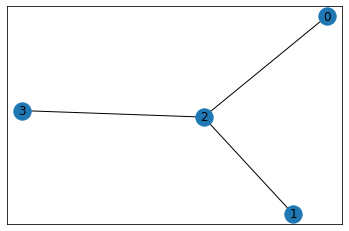

In [4]:
nx.draw_networkx(G)
G.edges.data("weight")
G.edges.data("weight")
print("你好")

# pandasB站

In [5]:
import pandas as pd

t1 = pd.Series([1, 2, 31, 12, 3, 4])
t1
type(t1)

0     1
1     2
2    31
3    12
4     3
5     4
dtype: int64

pandas.core.series.Series

In [6]:
t2 = pd.Series([1, 23, 2, 2, 1], index = list("abcde"))
t2
t2.astype(float)

a     1
b    23
c     2
d     2
e     1
dtype: int64

a     1.0
b    23.0
c     2.0
d     2.0
e     1.0
dtype: float64

In [7]:
#通过字典创建pandas的Series对象
temp_dict = {"name":"xiaohong", "age":30, "tel":10086}

t3 = pd.Series(temp_dict)
t3

name    xiaohong
age           30
tel        10086
dtype: object

In [8]:
import string
a = {string.ascii_uppercase[i]:i for i in range(10)}

a
pd.Series(a)
pd.Series(a, index = list(string.ascii_uppercase[5:15]))

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

A    0
B    1
C    2
D    3
E    4
F    5
G    6
H    7
I    8
J    9
dtype: int64

F    5.0
G    6.0
H    7.0
I    8.0
J    9.0
K    NaN
L    NaN
M    NaN
N    NaN
O    NaN
dtype: float64

## pandas切片和索引操作
1. 参考numpy的切片和索引
2. `pandas`的where方法和ndarray有所不同

In [9]:
t3.index
type(t3.index)
len(t3.index)
list(t3.index)
list(t3.index)[:2]
t3.values
type(t3.values)

Index(['name', 'age', 'tel'], dtype='object')

pandas.core.indexes.base.Index

3

['name', 'age', 'tel']

['name', 'age']

array(['xiaohong', 30, 10086], dtype=object)

numpy.ndarray

# pandas之读取外部数据
1. 如果数据存储在csv中，那么可以用`pd.readcsv()`

In [10]:
df = pd.read_csv('./dogNames2.csv')

df

,Row_Labels,Count_AnimalName
0,1,1
1,2,2
2,40804,1
3,90201,1
4,90203,1
...,...,...
16215,37916,1
16216,38282,1
16217,38583,1
16218,38948,1


## pandas的常用数据类型
1. Series 一维，带标签数组
2. DataFrame二维，Series容器

In [11]:
#DataFrame测试代码
pd.DataFrame(np.arange(12).reshape(3, 4))#竖着的是行索引，横着的是列索引
# ?pd.DataFrame
A = pd.DataFrame(np.arange(12).reshape(3, 4), index=list('abc'), columns=list('WXYZ'))#竖着的是行索引，横着的是列索引

A

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


,W,X,Y,Z
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [12]:
d1 = {"name":["xiaohong", "xiaoming"], "age":[28, 20], "tel": [10086, 10000]}

df1 = pd.DataFrame(d1, index= ['person{}'.format(i) for i in 'AB'])

## pandas中DataFrame的属性
1. df.index
2. df.columns
3. df.values

In [13]:
df1.index
df1.columns
df1.values
df1.shape
df1.dtypes
df1.ndim
df1.head(3)#显示几行
df1.tail(1)#显示最后一行
df1.info()
df1.describe()#快速统计当前数据的基本信息

Index(['personA', 'personB'], dtype='object')

Index(['name', 'age', 'tel'], dtype='object')

array([['xiaohong', 28, 10086],
       ['xiaoming', 20, 10000]], dtype=object)

(2, 3)

name    object
age      int64
tel      int64
dtype: object

2

,name,age,tel
personA,xiaohong,28,10086
personB,xiaoming,20,10000


,name,age,tel
personB,xiaoming,20,10000


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, personA to personB
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2 non-null      object
 1   age     2 non-null      int64 
 2   tel     2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 64.0+ bytes


,age,tel
count,2.000000,2.000000
mean,24.000000,10043.000000
std,5.656854,60.811183
min,20.000000,10000.000000
25%,22.000000,10021.500000
50%,24.000000,10043.000000
75%,26.000000,10064.500000
max,28.000000,10086.000000


### 显示最高频词的狗的名字

In [14]:
df = pd.read_csv('./dogNames2.csv')

# df.describe()
#DataFrame中排序的方法
df = df.sort_values(by = "Count_AnimalName", ascending = False) 
df.head(5) 
type(df[5:10])
df[5:10]["Row_Labels"]

,Row_Labels,Count_AnimalName
1156,BELLA,1195
9140,MAX,1153
2660,CHARLIE,856
3251,COCO,852
12368,ROCKY,823


pandas.core.frame.DataFrame

8417     LOLA
8552    LUCKY
8560     LUCY
2032    BUDDY
3641    DAISY
Name: Row_Labels, dtype: object

## pandas的数据操作
1. 数据排序 pdobj.sort_values(by = "sortCol", ascending = True) #根据给定的coloum进行排序，默认升序排列
2. pandas取行取列，`pdobj[取行]["列索引"]`通过取行数组进行取行操作，列索引取具体的列
3. `pdobj.loc[]`通过标签索引行数据
4. `pdobj.iloc[]`通过位置获取数据
5. `pdobj.dropna(axis = 0, how='all')`删除元素全为`NaN`的行
6. `pdobj.dropna(axis = 0, how = 'any', inplace=True)`删除元素中有`NaN`的行,inplace为True的时候更新原有pdobj
7. `pdobj.fillna(fillvalue)`
8. 'seriesobj.value_counts()'
9. `seriesObj.append()`在后面添加新的Series
10. `seriesObj.sort_values(by= 'columns')`根据哪一列进行排序

In [15]:
A
A.loc[:,'W']
A.iloc[2, 3]
A.iloc[2, 3] = 66
A

,W,X,Y,Z
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


a    0
b    4
c    8
Name: W, dtype: int64

11

,W,X,Y,Z
a,0,1,2,3
b,4,5,6,7
c,8,9,10,66


### pandas的布尔索引
1. 单个条件索引
2. 多个条件索引，通过`()`并使用`&`和`|`进行切片

In [16]:
#索引使用次数超过800的狗的名字
over800_df = df[(df['Count_AnimalName']>800 )&(df['Count_AnimalName']<1000)] #切片操作
over800_df

,Row_Labels,Count_AnimalName
2660,CHARLIE,856
3251,COCO,852
12368,ROCKY,823


In [17]:
#使用次数超过700并且字符串的长度大于4的狗的名字
df[(df["Row_Labels"].str.len()>4)&(df["Count_AnimalName"]>700)]

,Row_Labels,Count_AnimalName
1156,BELLA,1195
2660,CHARLIE,856
12368,ROCKY,823
8552,LUCKY,723


## 缺失数据的处理
1. `isnull()`判断数据是否为`NaN`
2. `fillna()`
3. `dropna()`
pandas中计算

处理为0的数据，t[t==0]=np.nan,在pandas中nan不参与计算，但是0会

## 电影数据分析

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './IMDB-Movie-Data.csv'

df = pd.read_csv(file_path)

print(df.head(1))#打印第一条数据

   Rank                    Title                    Genre  \
0     1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   

                                         Description    Director  \
0  A group of intergalactic criminals are forced ...  James Gunn   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  


In [19]:
df.info()#显示这个数据集的描述信息
df.index #显示数据集index
df.columns#显示数据集的信息列

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


RangeIndex(start=0, stop=1000, step=1)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

## 可以对这个数据做一些有趣的操作
1. 查看最高最低评分
2. 查看电影时长的长短
3. 查看平均时长、评分
4. 查看导演、演员人数
5. 查看导演、演员参与度最高的前几名
6. 查看名字最长的导演、演员
7. 查看占比最大的电影类型
8. 好、烂片率最高的导演或演员

In [20]:
def calBasicInfo(origin_data, showTag = False):
    basic_info = {}#声明一个空白的字典类型
    movie_rating = origin_data['Rating']
    movie_runtime = origin_data['Runtime (Minutes)']
    basic_info['min_rating'] = min(movie_rating);
    basic_info['max_rating'] = max(movie_rating);
    basic_info['min_runtime'] = min(movie_runtime);
    basic_info['max_runtime'] = max(movie_runtime);
    basic_info['mean_rating'] = movie_rating.mean();
    basic_info['mean_runtime'] = movie_runtime.mean();
    typeList = df['Genre'].tolist().split(',')
    cnt_typerList =  sorted(typeList, key= lambda genreName: len(genreName), reverse=True) #根据名字长度由长到短排序
    printType = ["'{}'这种电影居第{}位".format(cnt_typerList[i], i+1) for i in range(10)]
    if showTag is True:
        print("最低评分和最高评分", min(movie_rating), max(movie_rating))
        print("最短时间和最长时间", min(movie_runtime), max(movie_runtime))
        print("平均评分", movie_rating.mean())
        print("平均时长", movie_runtime.mean(), "min")
        
    return basic_info;

In [21]:
calBasicInfo(df, showTag = True)

AttributeError: 'list' object has no attribute 'split'

In [22]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [23]:
def calExtraInfo(origin_data, showTag = False):
    #获得电影本身的相关信息
    movie_rating = origin_data['Rating']
    movie_type = origin_data['Genre']
    
    #计算烂片率
    rubbish_MoiveList = origin_data[origin_data['Rating']<6]; #根据评分进行数据切分
    num_rubbishDirector =  len(rubbish_MoiveList)
    print('烂片数量', num_rubbishDirector)
    #计算导演的烂片数
    rubbish_DirectorList = rubbish_MoiveList['Director']
    cnt_rubbish_DirectorList = rubbish_DirectorList.value_counts(ascending=False);
    print('烂片导演数量', len(cnt_rubbish_DirectorList))
    ['烂片数量第{}多的导演是{},他负责了{}部烂片'.format(i+1,cnt_rubbish_DirectorList.index[i], \
                                       cnt_rubbish_DirectorList.values[i]) for i in range(len(cnt_rubbish_DirectorList))]
     rubbish_DirectorNum = np.zeros(num_rubbishDirector,1);
    #统计好片数
    good_MovieList = df[df['Rating']>8];
    len(good_MovieList)
    #先对导演的相关信息进行统计汇总
    directorList = list(set(origin_data['Director'].tolist()))
    director_nameLength = [len(directorList[i]) for i in range(len(directorList))]
    good_MovieList = 
    handled_data = pd.DataFrame(directorList, columns=['Director'])
    handled_data['NameLength'] = director_nameLength
    
    #对演员相关信息进行操作
    actorList = list(set(origin_data['Actors'].tolist()))
       #计算演员的烂片数
    rubbish_ActorList = rubbish_MoiveList['Actors'].tolist();
    # cnt_rubbish_ActorList = rubbish_MoiveList['Actors'].value_counts(ascending=False, normalize= True)
    new_rubbish_ActorList = pd.Series(rubbish_ActorList[0].split(','));
    for i in range(1, len(rubbish_ActorList)):
       new_rubbish_ActorList =  new_rubbish_ActorList.append(pd.Series(rubbish_ActorList[i].split(',')))
    print('烂片演员数量', len(new_rubbish_ActorList))
    cnt_rubbish_ActorList = new_rubbish_ActorList.value_counts()
    ['烂片数量第{}多的演员是{},他出演了{}部烂片'.format(i+1,cnt_rubbish_ActorList.index[i], cnt_rubbish_ActorList.values[i]) for i in range(5)]

    return handled_data;

IndentationError: unexpected indent (<ipython-input-23-9c10cc2e9211>, line 16)

In [24]:
temp = calExtraInfo(df)
temp
# newTemp = pd.DataFrame(temp,index = range(1, len(temp+1)), columns=['Director', 'DirectorNameLength'])
# newTemp

NameError: name 'calExtraInfo' is not defined

In [25]:
movie_rating = df['Rating']
movie_runtime = df['Runtime (Minutes)']
#查看是否有缺省值
sum(pd.isna(movie_rating))
sum(pd.isna(movie_runtime))
print("最低评分和最高评分", min(movie_rating), max(movie_rating))
print("最短时间和最长时间", min(movie_runtime), max(movie_runtime))
type(movie_runtime)
# movie_rating.head(4)
print("平均评分", movie_rating.mean())
print("平均时长", movie_runtime.mean(), "min")
#得到导演、演员的人数
directorList = set(df['Director'].tolist())
actorList = set(df['Actors'].tolist())
print("导演人数", len(directorList))
print("演员人数", len(actorList))
#计算名字长度
sorted_directorList = sorted(directorList, key= lambda directorName: len(directorName), reverse=True) #根据名字长度由长到短排序
printName = ["所有导演中，{}的名字为第{}长".format(sorted_directorList[i], i+1) for i in range(5)]
printName
#计算电影的类型
typeList = set(df['Genre'].tolist())
cnt_typerList =  sorted(typeList, key= lambda genreName: len(genreName), reverse=True) #根据名字长度由长到短排序
printType = ["'{}'这种电影居第{}位".format(cnt_typerList[i], i+1) for i in range(10)]
printType


0

0

最低评分和最高评分 1.9 9.0
最短时间和最长时间 66 191


pandas.core.series.Series

平均评分 6.723199999999999
平均时长 113.172 min
导演人数 644
演员人数 996


['所有导演中，Florian Henckel von Donnersmarck的名字为第1长',
 '所有导演中，Alejandro González Iñárritu的名字为第2长',
 '所有导演中，Juan Carlos Fresnadillo的名字为第3长',
 '所有导演中，Rawson Marshall Thurber的名字为第4长',
 '所有导演中，Christopher McQuarrie的名字为第5长']

["'Animation,Adventure,Comedy'这种电影居第1位",
 "'Biography,History,Thriller'这种电影居第2位",
 "'Action,Adventure,Biography'这种电影居第3位",
 "'Animation,Adventure,Family'这种电影居第4位",
 "'Animation,Action,Adventure'这种电影居第5位",
 "'Adventure,Biography,Drama'这种电影居第6位",
 "'Adventure,Sci-Fi,Thriller'这种电影居第7位",
 "'Adventure,Fantasy,Mystery'这种电影居第8位",
 "'Action,Adventure,Thriller'这种电影居第9位",
 "'Adventure,Biography,Crime'这种电影居第10位"]

In [26]:
#计算导演、演员的出场率
fullDirectorList = df['Director']
cnt_fullDirectorList = fullDirectorList.value_counts(ascending=True, normalize= True);
# len(cnt_fullDirectorList) 
fullActorList = df['Actors'].tolist();
cnt_fullActorList = df['Actors'].value_counts(ascending=True, normalize= True)
# cnt_fullActorList
new_fullActorList = pd.Series(fullActorList[0].split(','));
for i in range(1, len(fullActorList)):
   new_fullActorList =  new_fullActorList.append(pd.Series(fullActorList[i].split(',')))
len(new_fullActorList)
new_fullActorList.value_counts()
print('演员总人数:', len(set(new_fullActorList)))

3999

Mark Wahlberg            11
Christian Bale           11
Adam Sandler              9
Matthew McConaughey       9
Brad Pitt                 9
                         ..
 Matthew McConaughey      1
 Émilie Leclerc           1
 Christopher Fairbank     1
 Sakshi Tanwar            1
 Amanda Righetti          1
Length: 2394, dtype: int64

演员总人数: 2394


In [27]:
#计算导演导片率
new_fullDirectorList  = pd.Series(fullDirectorList[0].split(','));
for i in range(1, len(fullActorList)):
   new_fullDirectorList =  new_fullDirectorList.append(pd.Series(fullDirectorList[i].split(',')))
len(new_fullDirectorList)
print("导演导片次数统计")
new_fullDirectorList.value_counts()

1000

导演导片次数统计


Ridley Scott          8
M. Night Shyamalan    6
Michael Bay           6
Paul W.S. Anderson    6
David Yates           6
                     ..
Matteo Garrone        1
Will Slocombe         1
Julia Leigh           1
Nic Mathieu           1
Dan Scanlon           1
Length: 644, dtype: int64

In [28]:
#计算烂片率
rubbish_MoiveList = df[df['Rating']<6];
print('烂片数量', len(rubbish_MoiveList))
#计算导演的烂片数
rubbish_DirectorList = rubbish_MoiveList['Director']
cnt_rubbish_DirectorList = rubbish_DirectorList.value_counts(ascending=False);
print('烂片导演数量', len(cnt_rubbish_DirectorList))
['烂片数量第{}多的导演是{},他负责了{}部烂片'.format(i+1,cnt_rubbish_DirectorList.index[i], cnt_rubbish_DirectorList.values[i]) for i in range(5)]
#计算演员的烂片数
rubbish_ActorList = rubbish_MoiveList['Actors'].tolist();
# cnt_rubbish_ActorList = rubbish_MoiveList['Actors'].value_counts(ascending=False, normalize= True)
new_rubbish_ActorList = pd.Series(rubbish_ActorList[0].split(','));
for i in range(1, len(rubbish_ActorList)):
   new_rubbish_ActorList =  new_rubbish_ActorList.append(pd.Series(rubbish_ActorList[i].split(',')))
print('烂片演员数量', len(new_rubbish_ActorList))
cnt_rubbish_ActorList = new_rubbish_ActorList.value_counts()
['烂片数量第{}多的演员是{},他出演了{}部烂片'.format(i+1,cnt_rubbish_ActorList.index[i], cnt_rubbish_ActorList.values[i]) for i in range(5)]

#统计好片数
good_MovieList = df[df['Rating']>=8];
len(good_MovieList)

烂片数量 184
烂片导演数量 164


['烂片数量第1多的导演是Paul W.S. Anderson,他负责了5部烂片',
 '烂片数量第2多的导演是M. Night Shyamalan,他负责了4部烂片',
 '烂片数量第3多的导演是Eli Roth,他负责了3部烂片',
 '烂片数量第4多的导演是Dennis Dugan,他负责了2部烂片',
 '烂片数量第5多的导演是Kevin Smith,他负责了2部烂片']

烂片演员数量 736


['烂片数量第1多的演员是Adam Sandler,他出演了5部烂片',
 '烂片数量第2多的演员是 Taylor Lautner,他出演了4部烂片',
 '烂片数量第3多的演员是Kristen Stewart,他出演了4部烂片',
 '烂片数量第4多的演员是 Robert Pattinson,他出演了4部烂片',
 '烂片数量第5多的演员是Logan Lerman,他出演了3部烂片']

78

In [ ]:
len(rubbish_ActorList)
len(new_rubbish_ActorList)
type(rubbish_ActorList)
type(new_rubbish_ActorList)
len(cnt_rubbish_ActorList)
len(cnt_rubbish_ActorList)
type(cnt_rubbish_ActorList)
cnt_rubbish_ActorList

In [ ]:
#设置分组数
plt.hist(movie_rating, 50);
plt.figure();
width = 5; 
plt.hist(movie_runtime, range(min(movie_runtime), max(movie_runtime)+width, width) );
plt.xticks( range(min(movie_runtime), max(movie_runtime)+width, width), rotation = 90);
plt.grid();

## 整理测试

In [29]:
 director_highest_rating[handled_data.index[i]] = max(director_rating_series[handled_data.index[i]])

NameError: name 'director_rating_series' is not defined

In [30]:
max(director_rating_series[handled_data.index[i]])

NameError: name 'director_rating_series' is not defined

In [31]:
director_highest_rating

NameError: name 'director_highest_rating' is not defined

In [32]:
movie_rating = origin_data['Rating']
movie_type = origin_data['Genre']
movie_director = origin_data['Director'] #得到导演的列表
director_rating_series = origin_data['Rating'] #得到导演和评分的序列
director_rating_series.index = origin_data['Director']
cnt_director = movie_director.value_counts(ascending=False)#计算导演的导片数量
handled_data = pd.DataFrame(cnt_director)
handled_data.columns = ['totalMovieNum'] #数据流的index设置为导演名字，无重复。第一列为导演导片数量
director_name_length = [len(cnt_director.index[i]) for i in range(len(cnt_director))] #计算导演的名字长度
director_highest_rating = {}
director_lowest_rating = {}
for i in range(3):
    director_highest_rating[handled_data.index[i]] = max(director_rating_series[handled_data.index[i]])
    director_lowest_rating[handled_data.index[i]] = min(director_rating_series[handled_data.index[i]])

NameError: name 'origin_data' is not defined

In [33]:
handled_data.columns['NameLength'] = director_name_length

NameError: name 'director_name_length' is not defined

In [34]:
origin_data = df
movie_rating = origin_data['Rating']
movie_type = origin_data['Genre']
movie_director = origin_data['Director'] #得到导演的列表
director_rating_series = origin_data['Rating'] #得到导演和评分的序列
director_rating_series.index = origin_data['Director']
cnt_director = movie_director.value_counts(ascending=False)#计算导演的导片数量
director_name_length = [len(cnt_director.index[i]) for i in range(len(cnt_director))] #计算导演的名字长度
director_highest_rating = director_rating_series.value_counts()

handled_data

NameError: name 'handled_data' is not defined

In [35]:
movie_rating = origin_data['Rating']
movie_type = origin_data['Genre']
movie_director = origin_data['Director'] #得到导演的列表
director_rating_series = origin_data['Rating'] #得到导演和评分的序列
director_rating_series.index = origin_data['Director']
cnt_director = movie_director.value_counts(ascending=False)#计算导演的导片数量
director_name_length = [len(cnt_director.index[i]) for i in range(len(cnt_director))] #计算导演的名字长度
# director_highest_rating = pd.Series()
# director_lowest_rating = pd.Series()
# for director in cnt_director.index:
#     director_highest_rating[director] = max(director_rating_series[director])
#     director_lowest_rating[director] = min(director_rating_series[director])

# handled_data = pd.DataFrame(cnt_director)
# handled_data.columns = ['totalMovieNum']
# handled_data.columns['NameLength'] = director_name_length

In [36]:
len(pd.DataFrame(cnt_director))

644

In [37]:
type(director_rating_series)
director_rating_series.sort_values()

pandas.core.series.Series

Director
Jason Friedberg      1.9
Shawn Burkett        2.7
James Wong           2.7
Jonathan Holbrook    3.2
Micheal Bafaro       3.5
                    ... 
Christopher Nolan    8.6
Olivier Nakache      8.6
Nitesh Tiwari        8.8
Christopher Nolan    8.8
Christopher Nolan    9.0
Name: Rating, Length: 1000, dtype: float64

In [38]:
director_rating_series['Ridley Scott']

Director
Ridley Scott    7.0
Ridley Scott    8.0
Ridley Scott    6.7
Ridley Scott    7.8
Ridley Scott    6.0
Ridley Scott    5.3
Ridley Scott    6.9
Ridley Scott    7.1
Name: Rating, dtype: float64

In [39]:
max(director_rating_series['Ridley Scott'])
min(director_rating_series['Ridley Scott'])

8.0

5.3

In [40]:
rubbish_movie_data = origin_data[origin_data['Rating'] < 6]
good_movie_data = origin_data[origin_data['Rating'] >= 8]
rubbish_director_data= rubbish_movie_data['Director']    # 计算导演的烂片数
rubbish_director = rubbish_director_data.value_counts(ascending=False)
good_director_list = good_movie_data['Director']
good_director = good_director_list.value_counts(ascending=False)

handled_data['goodMovieNum'] = good_director
handled_data['badMovieNum'] = rubbish_director

/home/tangkun/miniconda3/envs/SNA/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ValueError: cannot reindex from a duplicate axis

In [ ]:
handled_data